In [1]:
# import mesa_reader to make its classes accessible
import mesa_reader as mr

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.colors import rgb2hex
import cutecharts.charts as ctc
from matplotlib.pyplot import xkcd

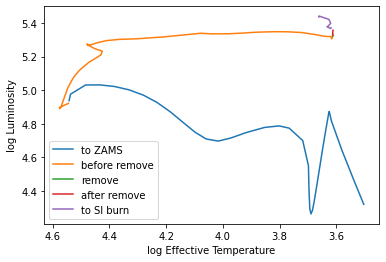

In [21]:
# make a MesaData object from a history file
h_to_zams = mr.MesaData('./LOGS_to_zams/history.data')
h_before_remove = mr.MesaData('./LOGS_before_remove/history.data')
h_remove = mr.MesaData('./LOGS_remove/history.data')
h_after_remove = mr.MesaData('./LOGS_after_remove/history.data')
h_to_si_burn = mr.MesaData('./LOGS_to_si_burn/history.data')
h_to_lgT_99 = mr.MesaData('./LOGS_to_lgT_9.9/history.data')
h_convert = mr.MesaData('./LOGS_convert/history.data')
h_finish = mr.MesaData('./LOGS_finish/history.data')

#plt.plot(h.log_Teff, h.log_L,label="")
plt.plot(h_to_zams.log_Teff, h_to_zams.log_L,label="to ZAMS")
plt.plot(h_before_remove.log_Teff, h_before_remove.log_L,label="before remove")
plt.plot(h_remove.log_Teff, h_remove.log_L,label="remove")
plt.plot(h_after_remove.log_Teff, h_after_remove.log_L,label="after remove")
plt.plot(h_to_si_burn.log_Teff, h_to_si_burn.log_L,label="to SI burn")


# set axis labels
plt.xlabel('log Effective Temperature')
plt.ylabel('log Luminosity')
plt.legend()

# invert the x-axis
plt.gca().invert_xaxis()

In [29]:
rayon = np.concatenate((h_to_zams.log_R, h_before_remove.log_R, h_remove.log_R,h_after_remove.log_R,h_to_si_burn.log_R,h_to_lgT_99.log_R,h_convert.log_R,h_finish.log_R))
age = np.concatenate((h_to_zams.star_age, h_before_remove.star_age, h_remove.star_age,h_after_remove.star_age,h_to_si_burn.star_age,h_to_lgT_99.star_age,h_convert.star_age,h_finish.star_age))
lum = np.concatenate((h_to_zams.log_L, h_before_remove.log_L, h_remove.log_L,h_after_remove.log_L,h_to_si_burn.log_L,h_to_lgT_99.log_L,h_convert.log_L,h_finish.log_L))
temp = np.concatenate((h_to_zams.log_Teff, h_before_remove.log_Teff, h_remove.log_Teff,h_after_remove.log_Teff,h_to_si_burn.log_Teff,h_to_lgT_99.log_Teff,h_convert.log_Teff,h_finish.log_Teff))
lum = np.exp(lum)
lum_norm = lum/max(lum)
rayon = np.exp(rayon)
temp = np.exp(temp)
temp_norm = temp/max(temp)


temp_essai = np.array(temp_norm*255, dtype=int)
temp_color = []
for i in range(0, len(temp_essai)-1):
    arrrr = np.array([1-temp_norm[i],0,temp_norm[i]])
    col = rgb2hex(arrrr)
    temp_color.append(col)
    
print(temp)

[33.24009287 33.46540102 34.37309869 35.93619325 37.25736269 37.53852837
 37.57627138 37.73276723 38.12514297 38.52472376 38.90447054 39.25627533
 39.56454691 39.82409065 40.04125244 40.2068602  40.31772318 40.40082652
 41.22057827 43.23367231 44.80237742 47.14610741 50.30894359 53.13283241
 55.52481975 57.93858478 60.27942063 62.97865547 65.74709511 68.9032072
 72.26138729 76.08583531 79.99569939 84.21347678 88.61638146 93.4315033
 93.90282285 94.14352545 97.16420744 97.06696833 96.58654719 95.5019086
 94.28772279 92.64715092 91.85238689 90.49031458 87.58629331 83.99135861
 83.52345053 85.27334129 85.75663053 86.60895621 87.31103383 87.66750851
 87.86935078 87.99434659 88.21150739 87.82963702 84.91857984 82.29864061
 78.68742544 73.91360165 67.26884397 59.02055013 56.79134977 53.58776423
 50.4049584  49.1230684  47.27627205 47.03854507 45.39898401 43.45223935
 41.44079293 39.37300614 38.2416536  37.71239302 37.47878832 37.41216468
 37.35495425 37.3225291  37.29396162 37.26647043 37.24

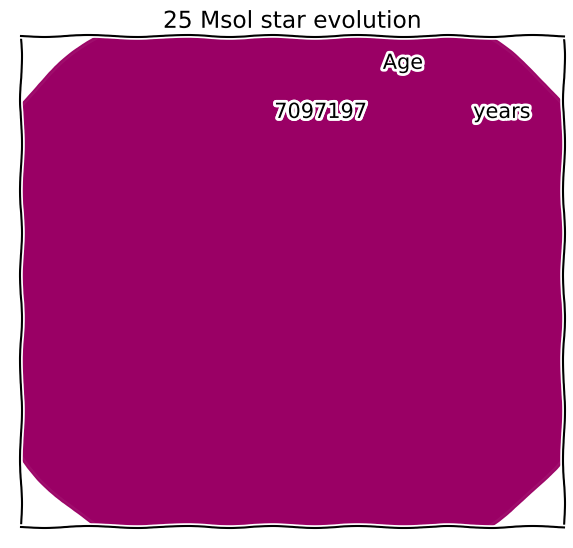

In [26]:

with plt.xkcd():  
    fig = plt.figure()
    fig.set_dpi(100)
    fig.set_size_inches(7, 6.5)
    
    ax = plt.axes(xlim=(-15, 15), ylim=(-15, 15))
    patch = plt.Circle((0, 0), rayon[0])
   # patch2 = plt.Arrow(1,0,-1,0)
    time_text2 = ax.text(5, 13, 'Age', fontsize=15)
    time_text = ax.text(-1, 10, '', fontsize=15)
    time_text3 = ax.text(10, 10, 'years', fontsize=15)
    ax.add_artist(patch)
  #  ax.add_artist(patch2)
    ax.add_artist(time_text)
    
    plt.title('25 Msol star evolution')
    
    ax2 = plt.gca()
    ax2.axes.xaxis.set_ticks([])
    ax2.axes.yaxis.set_ticks([])
    
def init():
    patch.center = (0, 0)
    ax.add_patch(patch)
  #  ax.add_patch(patch2)
    return patch, #patch2,

def animate(i):
    time_text.set_text(int(round(age[i])))
    patch.set_radius(rayon[i])
    patch.set_alpha(lum_norm[i])
    patch.set_color(temp_color[i])
   # patch2 = plt.Arrow(grav[i],0,-grav[i],0)
    return patch, time_text, #patch2,

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=198, 
                               interval=1,
                               blit=True)


anim.save('basic_animat.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

plt.show()